# Assignment 3: ICP + Non-linear least squares optimization

TEAM-NAME: 

YOUR-ID: 

YOUR-NAME:

## Instructions

* You are not allowed to use any external libraries (other than ones being imported below).
* The deadline for this assignment is **15-09-21** at 11:55pm.
* Plagiarism is **strictly prohibited**

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt

# Non Linear Least Squares Optimization

## 1.1 Gradient Descent
Implement the gradient descent algorithm using numpy and what you have learned from class to solve for the parameters of a gaussian distribution.
To understand the task in more detail and look at a worked through example, checkout the subsequent section. You have to implement the same using just numpy functions. You can refer to [Shubodh's notes](https://www.notion.so/saishubodh/From-linear-algebra-to-non-linear-weighted-least-squares-optimization-13cf17d318be4d45bb8577c4d3ea4a02) on the same to get a better grasp of the concept before implementing it.
* Experiment with the number of iterations.
* Experiment with the learning rate.
* Experiment with the tolerance.

Display your results using matplotlib by plotting graphs for 
* The cost function value vs the number of iterations
* The Ground Truth data values and the predicted data values.

Your plots are expected to contain information similar to the plot below:

<!-- <figure> -->
<img src='./helpers/sample_plt.png' alt=drawing width=500 height=600>

<!-- <figcaption align='center'><b>A sample plot, you can use your own plotting template</b></figcaption>
</figure> -->
<!-- head over to [this page](https://saishubodh.notion.site/Non-Linear-Least-Squares-Solved-example-Computing-Jacobian-for-a-Gaussian-Gradient-Descent-7fd11ebfee034f8ca89cc78c8f1d24d9) -->

## Worked out Example using Gradient Descent

A Gaussian distribution parametrized by $a,m,s$ is given by:

$$ y(x;a,m,s)=a \exp \left(\frac{-(x-m)^{2}}{2 s^{2}}\right) \tag{1}$$

### Jacobian of Gaussian

$$\mathbf{J}_y=\left[\frac{\partial y}{\partial a} \quad \frac{\partial y}{\partial m} \quad \frac{\partial y}{\partial s}\right] \\
= \left[ \exp \left(\frac{-(x-m)^{2}}{2 s^{2}}\right); \frac{a (x-m)}{s^2} \exp\left(\frac{-(x-m)^{2}}{2 s^{2}}\right);  \frac{a (x-m)^2}{s^3}\exp \left(\frac{-(x-m)^{2}}{2 s^{2}}\right)\right]$$

## Problem at hand

> Given a set of observations $y_{obs}$ and $x_{obs}$ we want to find the optimum parameters $a,m,s$ which best fit our observations given an initial estimate.

Our observations would generally be erroneous and given to us, but for the sake of knowing how good our model is performing, let us generate the observations ourselves by assuming the actual "actual" parameter values as $a_{gt}=10; m_{gt} =0; s_{gt} =20$ ($gt$ stands for ground truth). We will try to estimate these values based on our observations and let us see how close we get to "actual" parameters. Note that in reality we obviously don't have these parameters as that is exactly what we want to estimate in the first place. So let us consider the following setup, we have:

- Number of observations, $num\_obs = 50$
- Our 50 set of observations would be
    - $x_{obs} = np.linspace(-25,25, num\_obs)$
    - $y_{obs} = y(x_{obs};a_{gt},m_{gt},s_{gt})$  from $(1)$

Reference:

→[linspace](https://numpy.org/doc/stable/reference/generated/numpy.linspace.html)

- Say we are given initial estimate as:

    $$a_0=10; \quad m_0=13; \quad s_0=19.12$$

### Residual and error to be minimized

Okay, now we have set of observations and an initial estimate of parameters. We would now want to minimize an error that would give us optimum parameters.

The $residual$ would be given by

$$ r(a,m,s) = \left[ a \exp \left(\frac{-(x_{obs}-m)^{2}}{2 s^{2}}\right) - y_{obs}\ \right]$$

where we'd want to minimize $\|r\|^2$. Note that $r$ is a non-linear function in $(a,m,s)$.

Also, note that since $y$ (and $x$) are observations in the above equation, after simplification, we get $\mathbf{J}_r = \mathbf{J}_y$ [above](https://www.notion.so/c9e6f71b67a44bb8b366df2fccfc12d0) (since $y_{obs}$ is a constant).

Let us apply Gradient Descent method for minimization here. From [Table I](https://www.notion.so/From-linear-algebra-to-non-linear-weighted-least-squares-optimization-13cf17d318be4d45bb8577c4d3ea4a02),  

$$\Delta \mathbf{k} = - \alpha \mathbf{J_F} = -\alpha \mathbf{J}_r^{\top} {r}(\mathbf{k})$$

Note that $\mathbf{J_F}$ is the Jacobian of "non-linear least squares" function $\mathbf{F}$ while $\mathbf{J}_r$ is the Jacobian of the residual. 

where $\mathbf{k}$ is $[a,m,s]^T$. 

- Some hyperparameters:
    - Learning rate, $lr = 0.01$
    - Maximum number of iterations, $num\_iter=200$
    - Tolerance, $tol = 1e-15$

## Solution for 1 iteration

To see how each step looks like, let us solve for 1 iteration and for simpler calculations, assume we have 3 observations, 

$$x_{obs}= \left[ -25, 0, 25 \right]^T, y_{obs} = \left[  4.5783, 10, 4.5783 \right]^T. $$

With our initial estimate as $\mathbf{k_0} = [a_0=10, \quad m_0=13, \quad s_0=19.12]^T$, the residual would be 

$$ r(a_0,m_0,s_0) = \left[ a_0 \exp \left(\frac{-(x_{obs}-m_0)^{2}}{2 s_0^{2}}\right) - y_{obs}\ \right]$$

Therefore, $r=[-3.19068466, -2.0637411 , 3.63398058]^T$.

### Gradient Computation

Gradient, $\mathbf{J_F}$=

$$\mathbf{J_r}^{\top} \mathbf{r}(\mathbf{k})$$

We have calculated residual already [above](https://www.notion.so/c9e6f71b67a44bb8b366df2fccfc12d0), let us calculate the Jacobian $\mathbf{J_r}$.

$$\mathbf{J}_r
= \left[ \exp \left(\frac{-(x-m)^{2}}{2 s^{2}}\right); \frac{a (x-m)}{s^2} \exp\left(\frac{-(x-m)^{2}}{2 s^{2}}\right);  \frac{a (x-m)^2}{s^3}\exp \left(\frac{-(x-m)^{2}}{2 s^{2}}\right)\right]$$

$$\implies \mathbf{J_r} = \left[ \begin{array}{rrr}0.1387649 & 0.79362589, & 0.82123142 \\-0.14424057 & -0.28221715  & 0.26956967 \\0.28667059 & 0.19188405, & 0.16918599\end{array}\right]$$

So ,

$$\mathbf{J_F} = \mathbf{J_r}^{\top} \mathbf{r}(\mathbf{k})$$

$$\mathbf{r}(\mathbf{k}) =  \left[ \begin{array}{r}-3.19068466 \\ -2.0637411 \\ 3.63398058 \end{array} \right]$$

$$ \begin{aligned} \implies \mathbf{J_F} = \left[ \begin{array}{r} 0.89667553 \\ -1.25248392 \\-2.56179392\end{array} \right] \end{aligned}$$

### Update step

$$
\Delta \mathbf{k} = - \alpha \mathbf{J_F} \\
\mathbf{k}^{t+1} = \mathbf{k}^t + \Delta \mathbf{k}
$$

Here, $\alpha$ our learning rate is 0.01.

$$
\Delta \mathbf{k} = - \alpha\times\left[ \begin{array}{r} 
0.89667553 \\ -1.25248392 \\-2.56179392
\end{array} \right] = \left[ \begin{array}{r}
-0.00896676 \\ 0.01252484 \\0.02561794
\end{array}\right]
$$

$$
\mathbf{k}^{1} = \mathbf{k}^{0} + \Delta \mathbf{k} \\ \left[\begin{array}{r} 10 \\ 13 \\ 19.12 \end{array}\right] + \left[\begin{array}{c} 9.99103324 \\ 13.01252484 \\ 19.14561794 \end{array} \right]
$$

With just one iteration with very few observations, we can see that we have gotten *slightly* more closer to our GT parameter  $a_{gt}=10; m_{gt} =0; s_{gt} =20$. Our initial estimate was $[a_0=10, \quad m_0=13, \quad s_0=19.12]$. However, the above might not be noticeable enough: Hence you need to code it for more iterations and convince yourself as follows:

## Helper Functions

The helper functions were imported to the code itself as <i>make_non_linear</i> in the original helper function was giving issues while using it, the same function but with a numpy realization is used here

In [2]:
## Imports
def make_gaussian(x, a, mean, std):
    y = a * (1/(np.sqrt(2 * np.pi) * std)) * np.exp(-(x-mean)**2/(2*std**2))
    return y

def make_non_linear(x, p1, p2, p3, p4):
    y = p1 * np.exp(-x / p2) + p3 * np.sin(x / p4)
    return y


## Jacobian Functions

The jacobian functions for the make_gaussian function and standard gradient descent

In [3]:
def jacobian_r(k,x):
    da = (1/(np.sqrt(2*np.pi)*k[2]))*np.exp(-np.square(x-k[1])/(2*np.square(k[2])))
    dm = (k[0]*(x-k[1])/(np.sqrt(2*np.pi)*(np.power(k[2],3))))*np.exp(-np.square(x-k[1])/(2*np.square(k[2])))
    ds = (k[0])/(np.sqrt(2*np.pi)*np.square(k[2]))*np.exp(-np.square(x-k[1])/(2*np.square(k[2])))*((np.square(x-k[1])/np.square(k[2])) - 1)
    
    return np.array([da,dm,ds])

def jacobian_f(res,jac_r,lr):
        return lr*np.matmul(jac_r,res)

In [5]:
class Optimizer():
    def __init__(self,opt_fn,x_start = -25,x_end = 25,num_obs = 50,k_gt = [10,0,20],k_init = [10,13,19.12]):
        self.x = np.linspace(x_start,x_end,num_obs)
        self.opt_fn = opt_fn # The optimization function, make_gaussian for Q1.1 and Q1.3, make_non_linear for Q1.2
        self.y = self.opt_fn(self.x,*k_gt)
        self.k = k_init

    def residue(self):
        self.res = self.opt_fn(self.x,*self.k) - self.y

    def update_rule(self):
        self.k = self.k - self.jac_f

    def find_loss(self):
        return np.sum(np.square(self.res))

    def optimize(self,jacob_r,jacob_f,num_iters = 1000,lr = 1e-2):
        loss = []
        k_mat = []
        for i in range(num_iters):
            self.residue()
            self.jac_r = jacob_r(self.k,self.x)
            self.jac_f = jacob_f(self.res,self.jac_r,lr)

            self.update_rule()
            loss.append(self.find_loss())
            k_mat.append(self.k)
        return {'loss' : loss,'pred' : self.opt_fn(self.x,*self.k),'k_mat' : k_mat}

## Optimization

In [95]:
o1 = Optimizer(make_gaussian)
sol = o1.optimize(jacobian_r,jacobian_f,num_iters=10000,lr=1)

## Plots

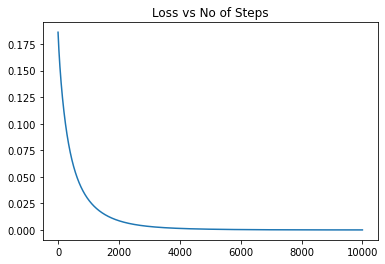

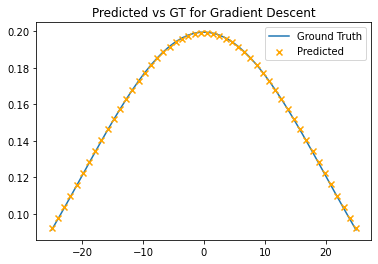

In [96]:
plt.plot(sol['loss'])
plt.title('Loss vs No of Steps')
plt.show()
plt.plot(o1.x,o1.y,zorder=1)
plt.scatter(o1.x,sol['pred'],c='orange',marker='x',zorder=2)
plt.legend(['Ground Truth','Predicted'])
plt.title('Predicted vs GT for Gradient Descent')
plt.show()

## 1.2: Another Non-Linear function
Now that you've got the hang of computing the jacobian matrix for a non-linear function via the aid of an example, try to compute the jacobian of a secondary gaussian function by carrying out steps similar to what has been shown above. The function is plotted below:

<img src='./helpers/non_linear.png' alt=drawing width=500 height=600>

Using the computed jacobian, optimise for the four parameters using gradient descent, where the parameters to be estimated are: 

$p_1$ = 2,  $p_2$ = 8,  $p_3$ = 4,  $p_4$ = 8. 

Do this for $x_{obs} = np.linspace(-20,30, num\_obs)$,
where $num\_obs$ is 50.



## Jacobian ($J_R$)

The changed jacobian as required with the change in the original function

In [8]:
## Jacobian Non-Linear

def nonlin_jacr(k,x):
    dp1 = np.exp(-x/k[1])
    dp2 = (k[0]*x/np.square(k[1]))*np.exp(-x/k[1])
    dp3 = np.sin(x/k[3])
    dp4 = (-k[2]*x/np.square(k[3]))*np.cos(x/k[3])

    return np.array([dp1,dp2,dp3,dp4])

## Optimize

In [9]:
o2 = Optimizer(make_non_linear,x_start=-20,x_end=30,k_gt=[2,8,4,8],k_init=[2,9.5,3.2,8])
nonlin_sol = o2.optimize(nonlin_jacr,jacobian_f,num_iters=10000,lr=0.01)

## Plots

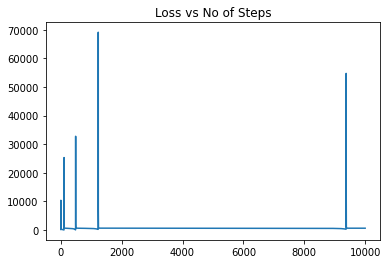

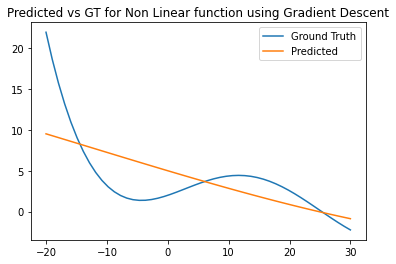

In [56]:
plt.plot(nonlin_sol['loss'])
plt.title('Loss vs No of Steps')
plt.show()
plt.plot(o2.x,o2.y)
plt.plot(o2.x,nonlin_sol['pred'])
plt.legend(['Ground Truth','Predicted'])
plt.title('Predicted vs GT for Non Linear function using Gradient Descent')
plt.show()

As the loss function has a local minima and is more than second order, it is unable to converge to the ground truth

## 1.3: Different Optimizers

Replace gradient descent with Gauss-Newton and Levenberg Marquardt algorithms and repeat question 1.1. 

To quickly recap, Gauss-Newton and Levenberg Marquardt are alternate update rules to the standard gradient descent. Gauss Newton updates work as:

$$\delta x = -(J^TJ)^{-1}J^Tf(x)$$

Levenberg Marquardt lies somewhere between Gauss Newton and Gradient Descent algorithms by blending the two formulations. As a result, when at a steep cliff, LM takes small steps to avoid overshooting, and when at a gentle slope, LM takes bigger steps:


$$\delta x = -(J^TJ + \lambda I)^{-1}J^Tf(x)$$

**Questions**
   * 1. How does the choice of initial estimate and learning rate affect convergence? Observations and analysis from repeated runs with modified hyperparameters will suffice.
   * 2. Do you notice any difference between the three optimizers? Why do you think that is? (If you are unable to see a clear trend, what would you expect in general based on what you know about them)

## Jacobian ($J_F$)

Changes in the $\Delta k$ as required by the different optimizers, to accomodate for this, the jacobian $J_F$ is changed to absorb all of the multiplied terms, i.e. $J_F^{mod} = \alpha J_F^{orig}$

In [23]:
def gauss_newton(res,jac_r,lr):
    jac_r = jac_r.T
    return (np.linalg.inv(jac_r.T@jac_r)@jac_r.T)@res

def levenberg_marquardt(res,jac_r,lr):
    jac_r = jac_r.T
    return np.linalg.inv(jac_r.T@jac_r + lr*np.identity(jac_r.shape[1]))@jac_r.T@res

## Optimize

Optimization using the Gauss-Newton optimizer

In [26]:
o_gn = Optimizer(make_gaussian)
sol_gn = o_gn.optimize(jacobian_r,gauss_newton,num_iters=100,lr=1e-2)

## Plots

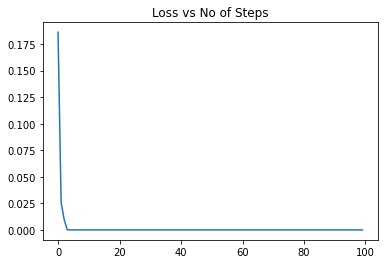

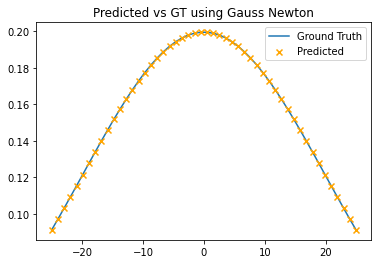

In [57]:
plt.plot(sol_gn['loss'])
plt.title('Loss vs No of Steps')
plt.show()
plt.plot(o_gn.x,o_gn.y,zorder=1)
plt.scatter(o_gn.x,sol_gn['pred'],c='orange',marker='x',zorder=2)
plt.legend(['Ground Truth','Predicted'])
plt.title('Predicted vs GT using Gauss Newton')
plt.show()

## Optimize

Optimization using the Levenberg-Marquardt optimizer

In [47]:
o_lm = Optimizer(make_gaussian)
sol_lm = o_lm.optimize(jacobian_r,levenberg_marquardt,num_iters=100,lr=1e-2)

## Plots

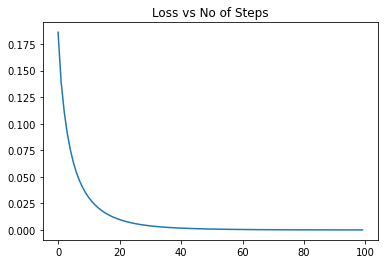

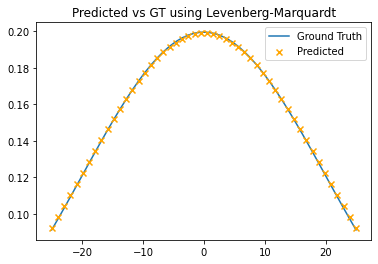

In [58]:
plt.plot(sol_lm['loss'])
plt.title('Loss vs No of Steps')
plt.show()
plt.plot(o_lm.x,o_lm.y,zorder=1)
plt.scatter(o_lm.x,sol_lm['pred'],c='orange',marker='x',zorder=2)
plt.legend(['Ground Truth','Predicted'])
plt.title('Predicted vs GT using Levenberg-Marquardt')
plt.show()

#### Answer 1 ( How does the choice of initial estimate and learning rate affect convergence?)

For this analysis, multiple starting points and learning rates will be taken and they will range from extreme to very close to ground truths for the starting value and learning rates will vary from extremely small to extremely large

##### Starting Points

In [117]:
k_x = np.linspace(1,100,5)
k_y = np.linspace(1,200,5)
k_z = np.linspace(1,400,5)

k_array = [[k_x[i],k_y[i],k_z[i]] for i in range(5)]

In [127]:
opt = []
for k_init in k_array:
    o_temp = Optimizer(make_gaussian,k_init=k_init)
    opt.append(o_temp.optimize(jacobian_r,jacobian_f,num_iters=10000,lr=0.1))

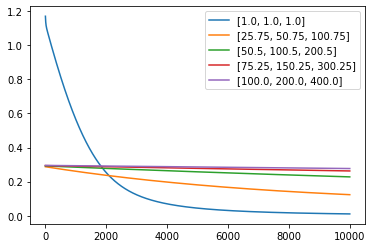

In [129]:
for i in range(5):
    plt.plot(opt[i]['loss'])
plt.legend(k_array)
plt.show()

##### Extremely small starting points

In this, the ground truth values are changed to [50,50,50] to test if extremely small starting points gives any appreciable advantage to gradient descent of if it doesn't care at all

In [216]:
k_x = np.linspace(1,60.1,5)
k_y = np.linspace(1,60.2,5)
k_z = np.linspace(1,60.4,5)

k_array = [[k_x[i],k_y[i],k_z[i]] for i in range(5)]

In [217]:
opt = []
for k_init in k_array:
    o_temp = Optimizer(make_gaussian,k_init=k_init,k_gt = [50,50,50])
    opt.append(o_temp.optimize(jacobian_r,jacobian_f,num_iters=10000,lr=0.1))

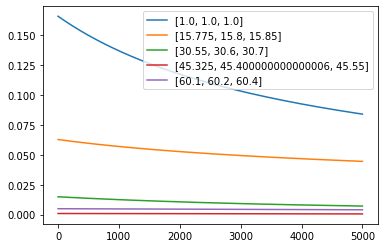

In [218]:
for i in range(5):
    plt.plot(opt[i]['loss'][5000:])
plt.legend(k_array)
plt.show()

From the two plots above, it can be seen that if the starting point is closer to the ground truth the gradient descent takes less amount of time to reach the optimum (loss $\approx 0$) than when it is farther away from the optimum. Another test done to see if gradient descent prefers small values yeilds a negative result and as it can be seen above, it only cares if it is closer to the ground truth and nothing else

##### Learning Rate

In [187]:
lr_array = np.linspace(-6,2,6)
opt = []
for lr in lr_array:
    o_temp = Optimizer(make_gaussian)
    opt.append(o_temp.optimize(jacobian_r,jacobian_f,num_iters=10000,lr=10**lr))

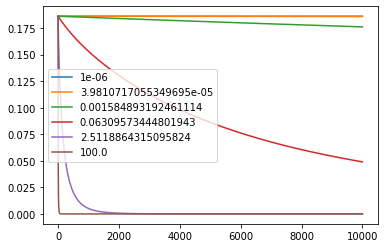

In [188]:
for i in range(len(lr_array)):
    plt.plot(opt[i]['loss'])
plt.legend(10**lr_array)
plt.show()

It can be seen that a very small learning rate would lead to very small descent and thus would take a lot of steps to reach near the ground truth. Increasing the learning rate would make the optimization problem take less amount of steps but till a certain limit. If it increases above a certain threshold, the gradient descent would just bounce around the optimum without converging. An example of such thing happening can be found below

##### Extremely High Learning Rate

In [185]:
o_temp = Optimizer(make_gaussian)
opt = o_temp.optimize(jacobian_r,jacobian_f,num_iters=10000,lr=400)

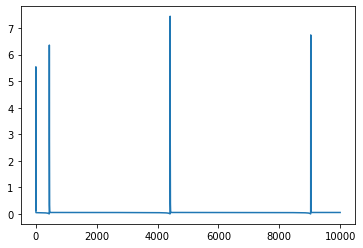

In [186]:
plt.plot(opt['loss'])

#### Conclusion

From the above two observations and analysis it can be concluded that, the closer the starting points are to ground truth, the smaller the time it will be taken for the gradient descent to get to the ground truth. On the other hand, the smaller the learning rate, the more the time it will take for it to reach the ground truth, but it will have a lower probability of jumping around the ground truth as compared to a higher learning rate which will take a smaller time to reach to the optimum, but will be prone to jumping around the ground truth.

#### Answer 2 (Do you notice any difference between the three optimizers? Why do you think that is?)

The differences in the three optimizers can be clearly seen from the loss functions

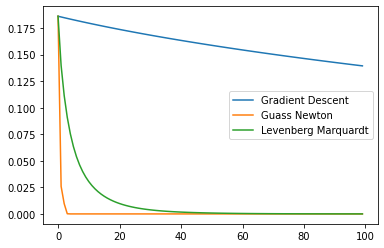

In [219]:
plt.plot(sol['loss'][:100])
plt.plot(sol_gn['loss'][:100])
plt.plot(sol_lm['loss'][:100])
plt.legend(['Gradient Descent','Guass Newton','Levenberg Marquardt'])
plt.show()

It can be seen that the gradient descent takes the longest time to reach to the optimum, but it is more due to the fact that the learning rate is low than anythin else. The main takeaway is that the learning rate is fixed in a standard gradient descent and thus will have a high amount of probability of either being too slow, thus taking a lot of time, or too large, and thus jumping around the optimum, as it was shown earlier.

By comparision, both Gauss-Newton and Levenberg-Marquardt optimizers have a variable learning rate dependent on the slope of the function. The difference between them is that Levengerg-Marquardt still gives a bit of control by giving a free parameter in $\lambda$ to control, which can make it faster or slower than Gauss-Newton depending on how it is tuned. On the other hand, Gauss-Newton automatically detents the length of the step as it is a function of the slope but gives no control and does th eupdate step without any hyperparameter. Thus it can be seen that the loss drops dramatically in the Gauss-Newton optimizer.

# 2. Iterative Closest Point

In this subsection, we will code the Iterative Closest Point algorithm to find the alignment between two point clouds without known correspondences. The point cloud that you will be using is the same as the one that you used in Assignment 1.

## 2.1: Procrustes alignment

1. Write a function that takes two point clouds as input wherein the corresponding points between the two point clouds are located at the same index and returns the transformation matrix between them.
2. Use the bunny point cloud and perform the procrustes alignment between the two bunnies. Compute the absolute alignment error after aligning the two bunnies.
3. Make sure your code is modular as we will use this function in the next sub-part.
4. Prove mathematically why the Procrustes alignment gives the best aligning transform between point clouds with known correspondences.


## 2.2: ICP alignment

1. Write a function that takes two point clouds as input without known correspondences and perform the iterative closest point algorithm.
2. Perform the ICP alignment between the two bunnies and plot their individual coordinate frames as done in class.
3. Does ICP always give the correct alignment? Why or Why not?
4. What are other variants of ICP and why are they helpful (you can look at point to plane ICP)?